<a href="https://colab.research.google.com/github/archie46/Deep-Learning-Lab/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
cd /content/drive/MyDrive/AML6/

/content/drive/MyDrive/AML6


In [ ]:
ls

archive.zip  chest_xray/  Lab1.ipynb  Lab6.ipynb  ROC.png


In [ ]:
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile("archive.zip", 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall()


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='chest_xray/train',
    labels='inferred',
    label_mode='int',
    batch_size=None,
)


val_ds=keras.utils.image_dataset_from_directory(
    directory='chest_xray/val',
    labels='inferred',
    label_mode='int',
    batch_size=None,
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='chest_xray/test',
    labels='inferred',
    label_mode='int',
    batch_size=None,
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
tf.print(train_ds)

<ShuffleDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


In [ ]:
train_images = []
train_labels = []
i = 0
for images,labels in train_ds:
  train_images.append(images)
  train_labels.append(labels)
  i+= 1
  if i > 2000:
    break
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
from tensorflow.python.ops.gen_logging_ops import ImageSummary
val_images = []
val_labels = []
for images,labels in val_ds:
  val_images.append(ImageSummary)
  val_labels.append(labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [ ]:
test_images = []
test_labels = []
i = 0
for images,labels in test_ds:
  test_images.append(images)
  test_labels.append(labels)
  i+= 1
  if i > 312:
    break
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_labels[1]

array([1.], dtype=float32)

In [ ]:
train_images.shape

(2001, 256, 256, 3)

array([1.], dtype=float32)

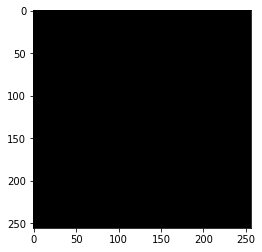

In [ ]:
plt.imshow(train_images[0].astype("uint8"))
train_labels[0]

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.build(input_shape=(256,256,3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 25,166,210
Trainable params: 25,166,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_classes = len(class_names)

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
63/63 [==============================] - 31s 477ms/step - loss: 27.8493 - accuracy: 0.7996
Epoch 2/5
63/63 [==============================] - 36s 578ms/step - loss: 8.2107 - accuracy: 0.8791
Epoch 3/5
63/63 [==============================] - 31s 491ms/step - loss: 3.5507 - accuracy: 0.9280
Epoch 4/5
63/63 [==============================] - 30s 479ms/step - loss: 3.4239 - accuracy: 0.9270
Epoch 5/5
63/63 [==============================] - 31s 495ms/step - loss: 5.2333 - accuracy: 0.9050


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 1s - loss: 37.1314 - accuracy: 0.7110 - 617ms/epoch - 62ms/step

Test accuracy: 0.7109634280204773


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

10/10 [==============================] - 1s 47ms/step


In [ ]:
predictions[0]

array([0.        , 0.99999994], dtype=float32)

In [ ]:
predictions[2]

array([0.        , 0.99999994], dtype=float32)

In [ ]:
np.max(predictions[0])

0.99999994

In [ ]:
pred_score = []
for i in range(301):
  pred_score.append(np.max(predictions[i]))
pred_score = np.array(pred_score)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
test_labels[0]

array([1.], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

TypeError: ignored

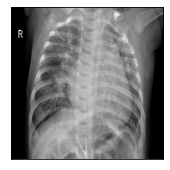

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

TypeError: ignored

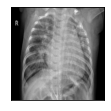

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
len(predictions)

301

In [ ]:
pred_labels = []
for i in range(301):
  pred_labels.append(np.argmax(predictions[i]))
pred_labels = np.array(pred_labels)

In [ ]:
test_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]

In [ ]:
pred_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)

array([[ 46,  63],
       [  2, 190]])

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_score)
metrics.auc(fpr, tpr)


0.8562213302752293

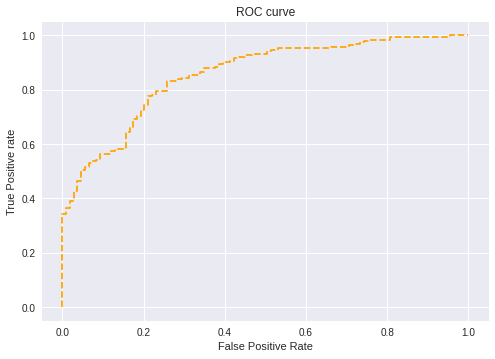

In [ ]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.42      0.59       109
           1       0.75      0.99      0.85       192

    accuracy                           0.78       301
   macro avg       0.85      0.71      0.72       301
weighted avg       0.83      0.78      0.76       301

